In [10]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
import matplotlib.animation as animation
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import time 

from datetime import datetime, timedelta
import cartopy.crs as ccrs

## Load data

In [2]:
df_oct = pd.read_csv("../data/DL_FIRE_M6_159160/fire_archive_M6_159160.csv")
df_oct["acq_date"] = pd.to_datetime(df_oct["acq_date"])
df_oct[["latitude_r","longitude_r"]] = df_oct[["latitude","longitude"]].round(0)
df_oct = df_oct.loc[df_oct.acq_date.dt.month==10]
df = pd.read_csv("../data/DL_FIRE_M6_172855/fire_archive_M6_172855.csv")
df["acq_date"] = pd.to_datetime(df["acq_date"])
df[["latitude_r","longitude_r"]] = df[["latitude","longitude"]].round(0)
df = pd.concat([df_oct,df])

In [3]:
brightness_sum = df.groupby(['latitude_r','longitude_r','acq_date'],as_index=False)[['brightness']].sum()

## Set up formatting for the video files

In [ ]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)

## Building Interval for saving video

In [36]:
frames=[]
interval_length = 10
for c in range((end_date - start_date).days):
    for interval in range(interval_length):
        frames.append(c)

## Initialize map

In [ ]:
start_date = datetime(2019, 10, 10)
end_date = datetime(2020, 9, 30)
fig = plt.figure(figsize=(19.2, 10.8))

## Animation Function

In [40]:
def animate(days):
    fig.clear()
    ax = plt.axes(projection=ccrs.PlateCarree())
    date = start_date + timedelta(days)
    df = brightness_sum.loc[brightness_sum['acq_date']==date]
    
    longs = df["longitude_r"]
    lats = df["latitude_r"]
    sizes = df['brightness']/10
    
    ax.scatter(longs,lats,s=sizes, alpha=0.2,color="r",
               transform=ccrs.PlateCarree())

    ax.stock_img()
    ax.coastlines()
    
    fontname = 'DejaVu Sans'
    fontsize = 25
    # Positions for the date and grad counter
    date_x = -53
    date_y = -50
    date_spacing = 80
    date = df.iloc[0]['acq_date']
    
    # Date text
    ax.text(date_x, date_y, 
            f"{date.strftime('%b %d, %Y')}", 
            color='white',
            fontname=fontname, fontsize=fontsize*1.3,
            transform=ccrs.PlateCarree())
    # Total grad counts
    ax.text(date_x + date_spacing, date_y, 
            "Total Bushfires", color='white',
            fontname=fontname, fontsize=fontsize,
            transform=ccrs.PlateCarree())
    ax.text(date_x + date_spacing*1.9, date_y, 
            f"{df['brightness'].count()}",
            color='white', ha='left',
            fontname=fontname, fontsize=fontsize*1.3,
            transform=ccrs.PlateCarree())

<ipython-input-40-1e8d13e0869f>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes(projection=ccrs.PlateCarree())


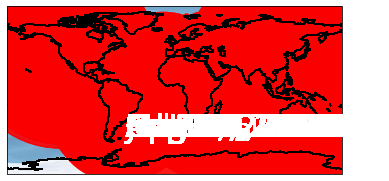

In [41]:
anim = FuncAnimation(fig, animate, frames=frames,interval=1000)

#plt.show()
anim.save('../animations/bushfire_animation.mp4', writer=writer)
#plt.rcParams['animation.html']= 'jshtml'